# Load data

In [41]:
# load the sat_SO_data and sic_SO_data from local file
import numpy as np
sat_SO_data = np.load('D:/VScode/Last_deglaciation/data/sat_SO_data.npy', allow_pickle=True)
sic_SO_data = np.load('D:/VScode/Last_deglaciation/data/sic_SO_data.npy', allow_pickle=True)

In [42]:
sat_SO_data.shape

(2451, 65)

In [43]:
import xarray as xr

data_dir = 'D:/VScode/Last_deglaciation/data'
ds_sat_EOFs = xr.open_dataset(data_dir + '/ds_sat_EOFs.nc')
# ds_sat_EOFs.info

sat_centered_weighted = ds_sat_EOFs['sat_centered_weighted'].values
sat_centered_weighted = sat_centered_weighted.reshape(len(ds_sat_EOFs['age']), 96*144)
print('shape of the reshaped sat_centered_weighted:', sat_centered_weighted.shape)



ds_seaice = xr.open_dataset('D:/VScode/Last_deglaciation/data/ds_seaice.nc')
sic_centered_weighted = ds_seaice['sic_centered_weighted'].values
sic_centered_weighted = sic_centered_weighted.reshape(len(ds_seaice['age']), 96*144)

print('shape of the reshaped sic_centered_weighted:', sic_centered_weighted.shape)

shape of the reshaped sat_centered_weighted: (65, 13824)
shape of the reshaped sic_centered_weighted: (65, 13824)


In [44]:
# load the lat_lon_pairs
import numpy as np
path='D:/VScode/Last_deglaciation/data/lat_lon_pairs.npy'
lat_lon_pairs=np.load(path, allow_pickle=True)
lat_lon_pairs

array([[-78.63158 , 182.5     ],
       [-76.73684 , 165.      ],
       [-76.73684 , 167.5     ],
       ...,
       [ 72.947365, 117.5     ],
       [ 72.947365, 120.      ],
       [ 72.947365, 125.      ]], dtype=float32)

# Doing MCA
See Rieger et al.,  2021 for detail\
ref: https://journals.ametsoc.org/view/journals/clim/34/24/JCLI-D-21-0244.1.xml


Also see:
https://atmos.uw.edu/~breth/classes/AS552/matlab/lect/html/MCA_PSSTA_USTA.html\
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# # Centering and normalizing sat_SO_data
# mean_sat = np.mean(sat_SO_data, axis=1)[:, np.newaxis]
# std_sat = np.std(sat_SO_data, axis=1)[:, np.newaxis]
# std_sat[std_sat == 0] = 1  # Avoid division by zero
# sat_SO_data_normalized = (sat_SO_data - mean_sat) / std_sat

# # Centering and normalizing sic_SO_data
# mean_sic = np.mean(sic_SO_data, axis=1)[:, np.newaxis]
# std_sic = np.std(sic_SO_data, axis=1)[:, np.newaxis]
# std_sic[std_sic == 0] = 1  # Avoid division by zero
# sic_SO_data_normalized = (sic_SO_data - mean_sic) / std_sic

# Cxy = np.dot(sat_SO_data_normalized, sic_SO_data_normalized.T) / 64  # (65-1)

# Cross-covariance matrix
Cxy = np.dot(sat_SO_data, sic_SO_data.T) / 64  # (65-1)



# Singular Value Decomposition
U, Sigma, Vt = np.linalg.svd(Cxy, full_matrices=False)

# Compute the squared covariance fraction (scf)
s = Sigma
scf = s**2 / np.sum(s**2)

# Extract the modes for both fields
eof_SO_sat1 = U[:, 0]
eof_SO_sat2 = U[:, 1]
eof_SO_sic1 = Vt[0, :]
eof_SO_sic2 = Vt[1, :]

# Compute temporal expansion coefficients
PC_SO_sat1 = np.dot(eof_SO_sat1, sat_SO_data)
PC_SO_sat2 = np.dot(eof_SO_sat2, sat_SO_data)
PC_SO_sic1 = np.dot(eof_SO_sic1, sic_SO_data)
PC_SO_sic2 = np.dot(eof_SO_sic2, sic_SO_data)



# Plot PCs

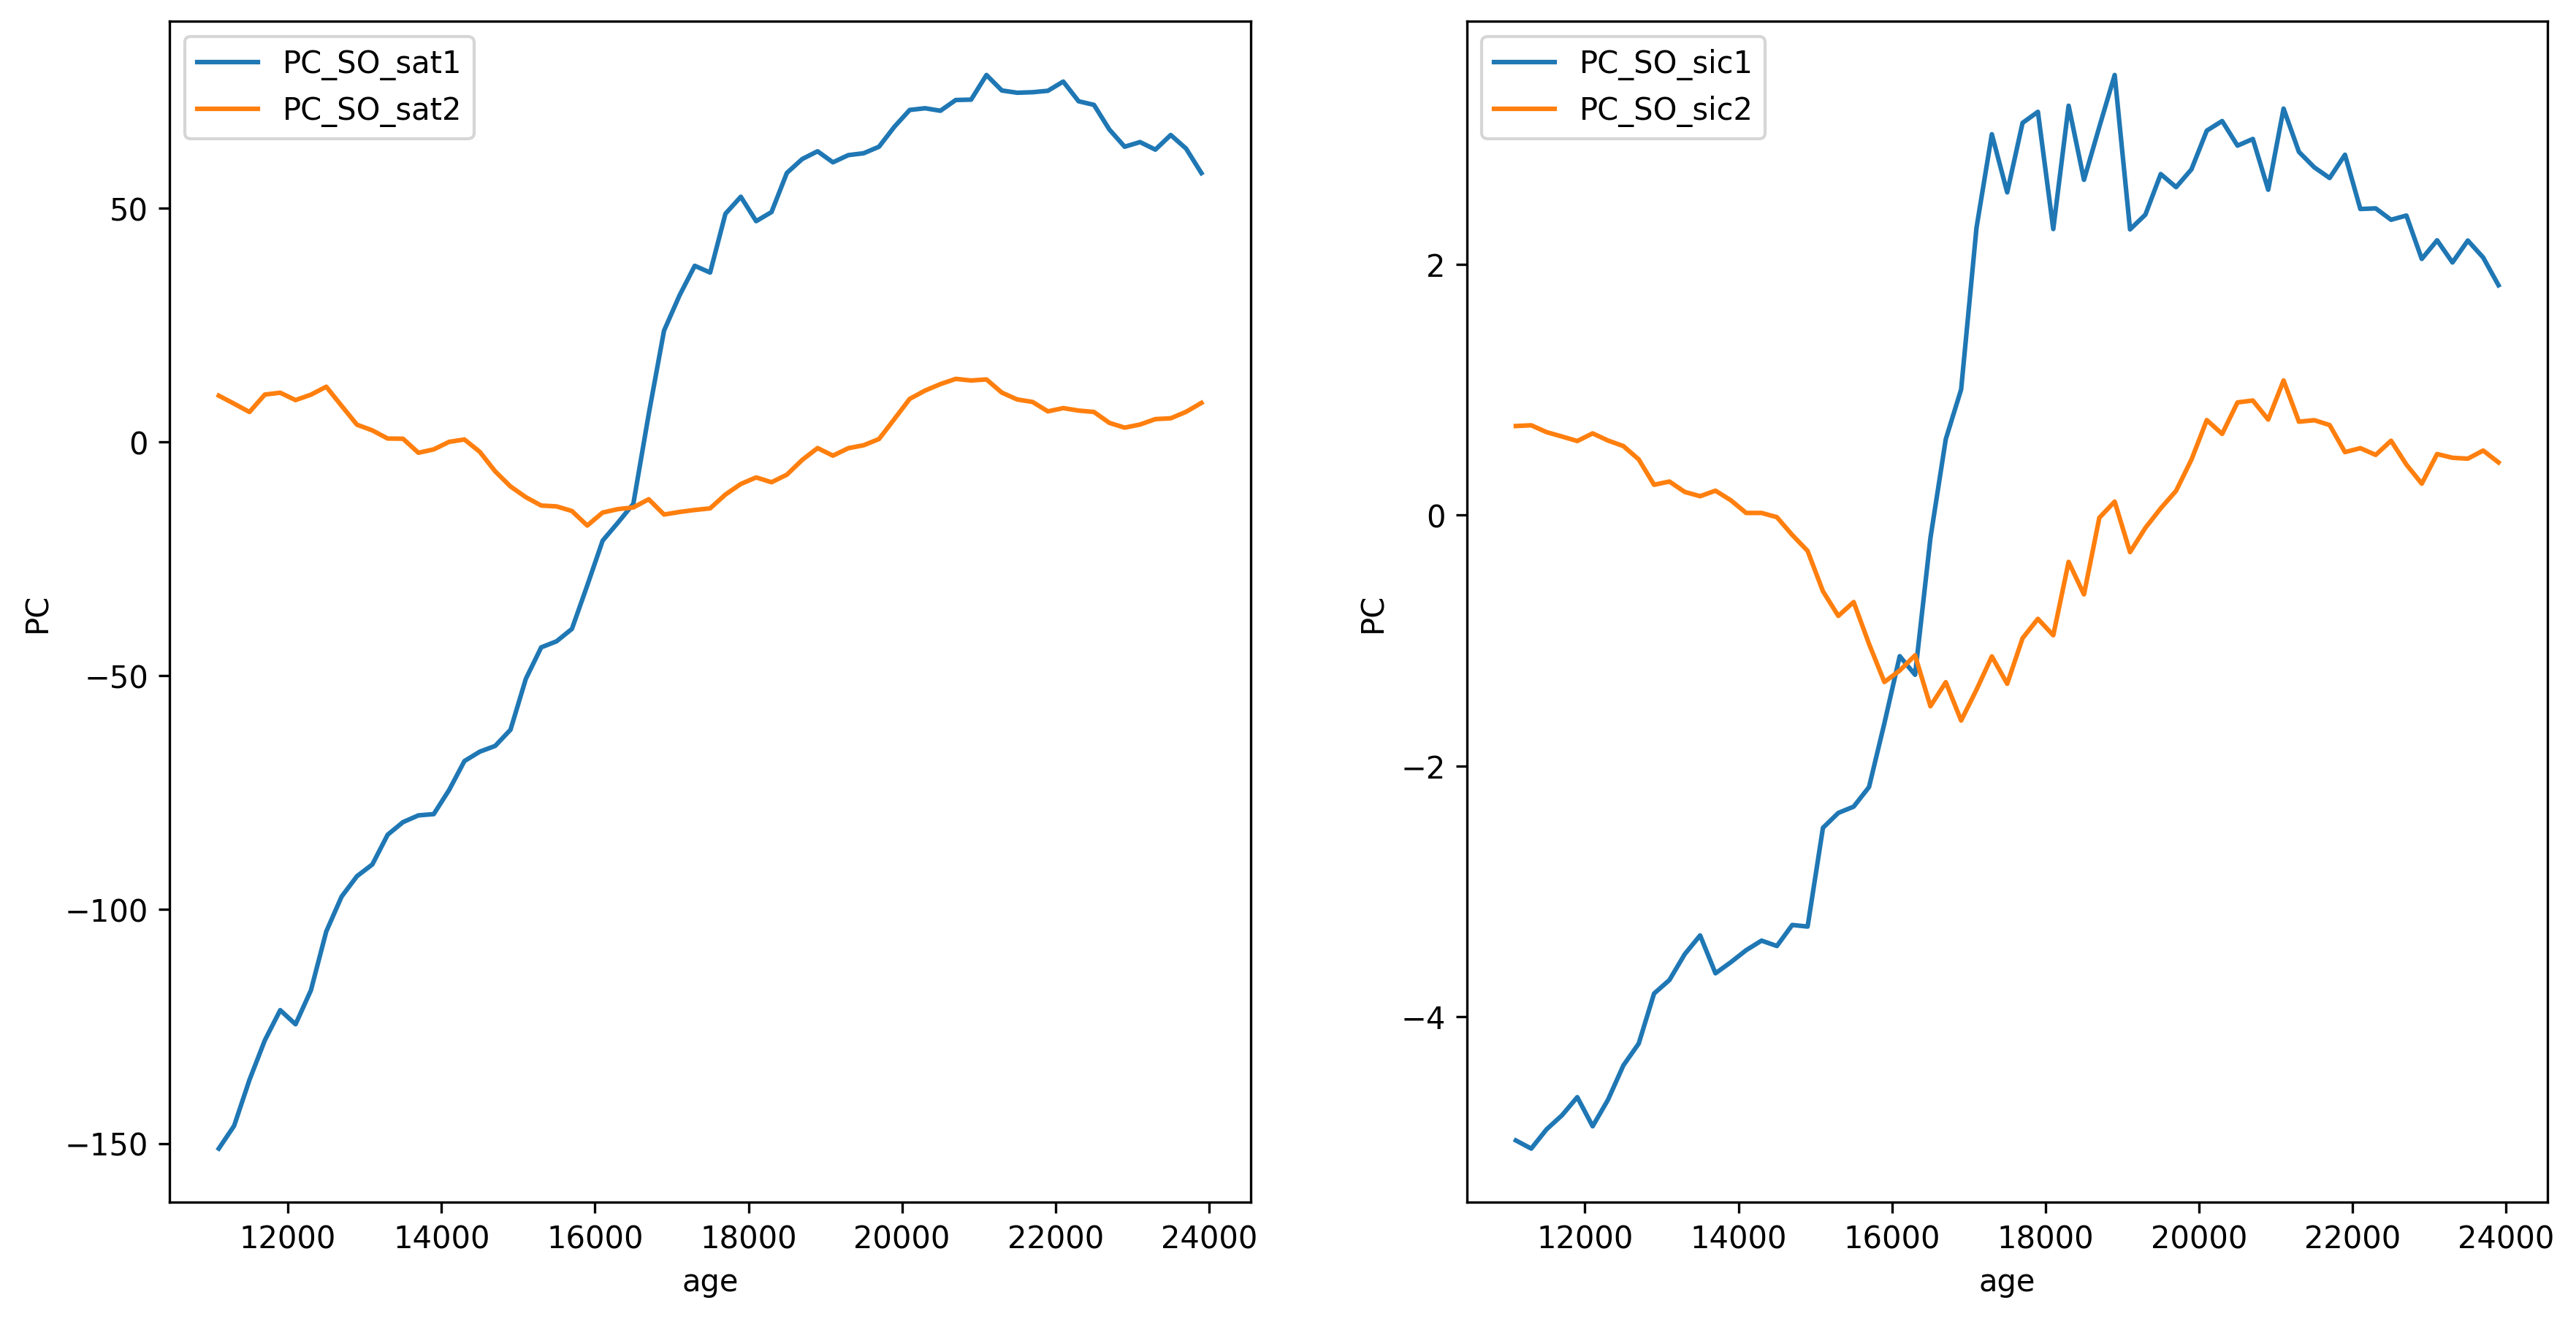

In [46]:
# plot the line plot of PC_SO_sat1 and PC_SO_sic1, and PC_SO_sat2 and PC_SO_sic2 side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

axs[0].plot(ds_sat_EOFs['age'], PC_SO_sat1, label='PC_SO_sat1')
axs[0].plot(ds_sat_EOFs['age'], PC_SO_sat2, label='PC_SO_sat2')
axs[0].set_xlabel('age')
axs[0].set_ylabel('PC')
axs[0].legend()

axs[1].plot(ds_seaice['age'], PC_SO_sic1, label='PC_SO_sic1')
axs[1].plot(ds_seaice['age'], PC_SO_sic2, label='PC_SO_sic2')
axs[1].set_xlabel('age')
axs[1].set_ylabel('PC')
axs[1].legend()


# Scale PCs for comparison

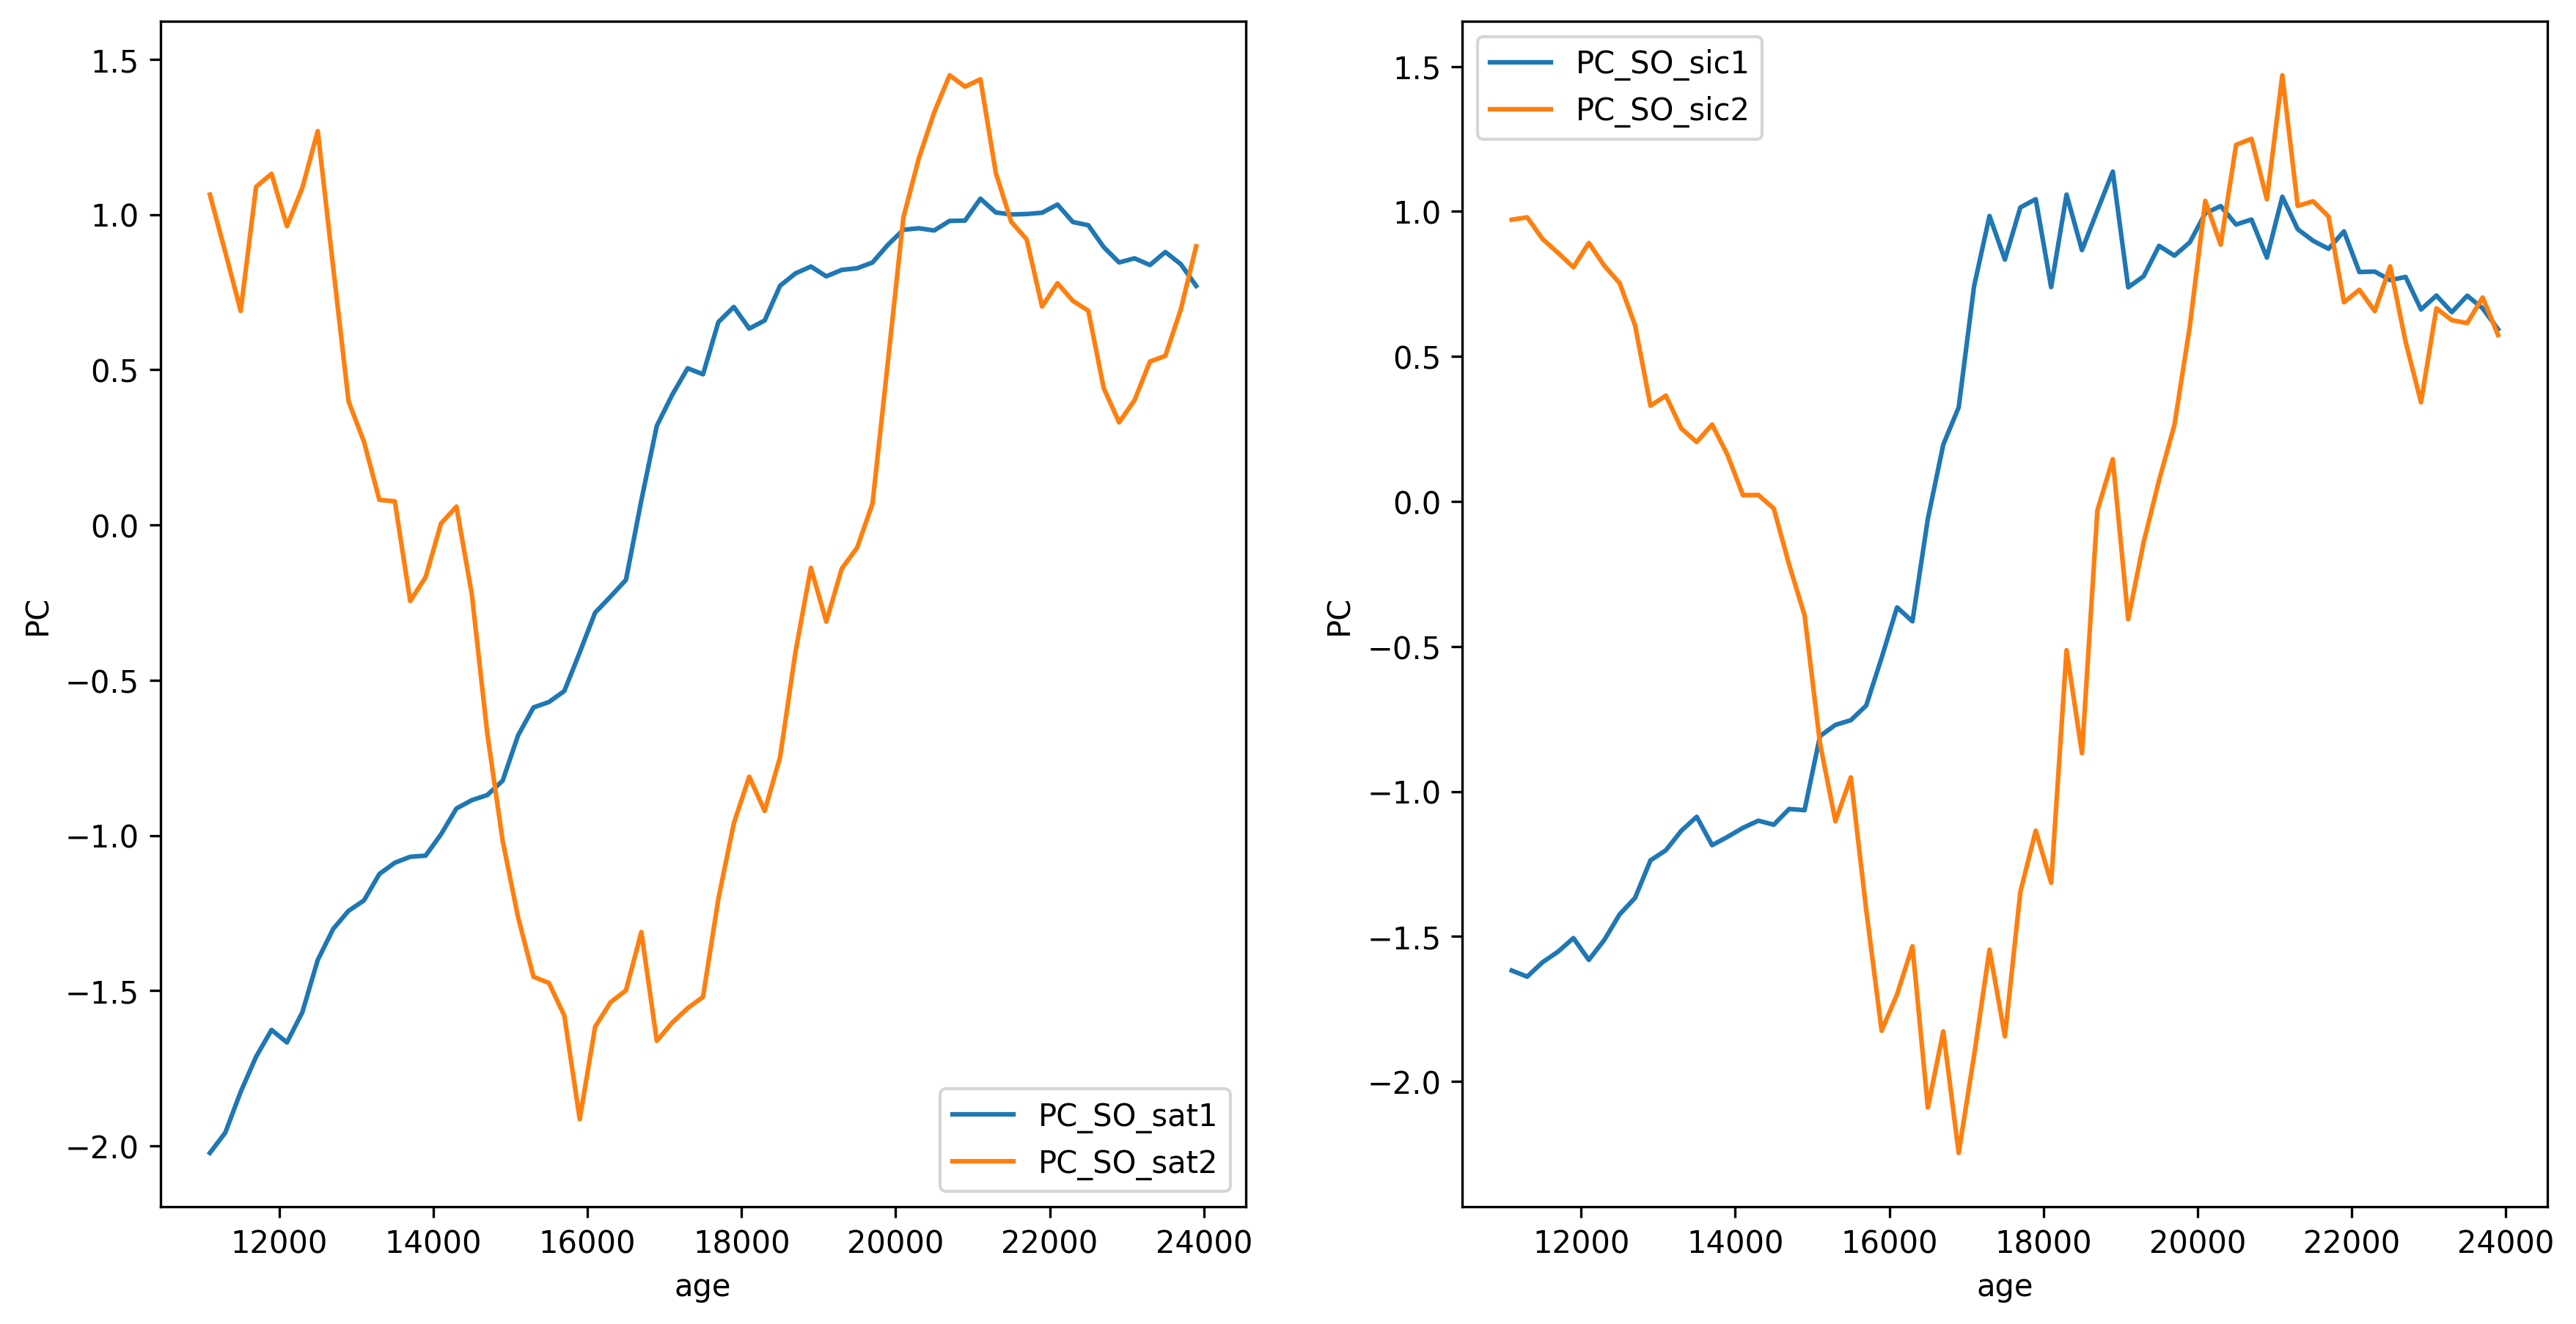

In [49]:
# plot the line plot of PC_SO_sat1 and PC_SO_sic1, and PC_SO_sat2 and PC_SO_sic2 side by side
import matplotlib.pyplot as plt
from scipy.stats import zscore

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

axs[0].plot(ds_sat_EOFs['age'], zscore(PC_SO_sat1), label='PC_SO_sat1')
axs[0].plot(ds_sat_EOFs['age'], zscore(PC_SO_sat2), label='PC_SO_sat2')
axs[0].set_xlabel('age')
axs[0].set_ylabel('PC')
axs[0].legend()

axs[1].plot(ds_seaice['age'], zscore(PC_SO_sic1), label='PC_SO_sic1')
axs[1].plot(ds_seaice['age'], zscore(PC_SO_sic2), label='PC_SO_sic2')
axs[1].set_xlabel('age')
axs[1].set_ylabel('PC')
axs[1].legend()


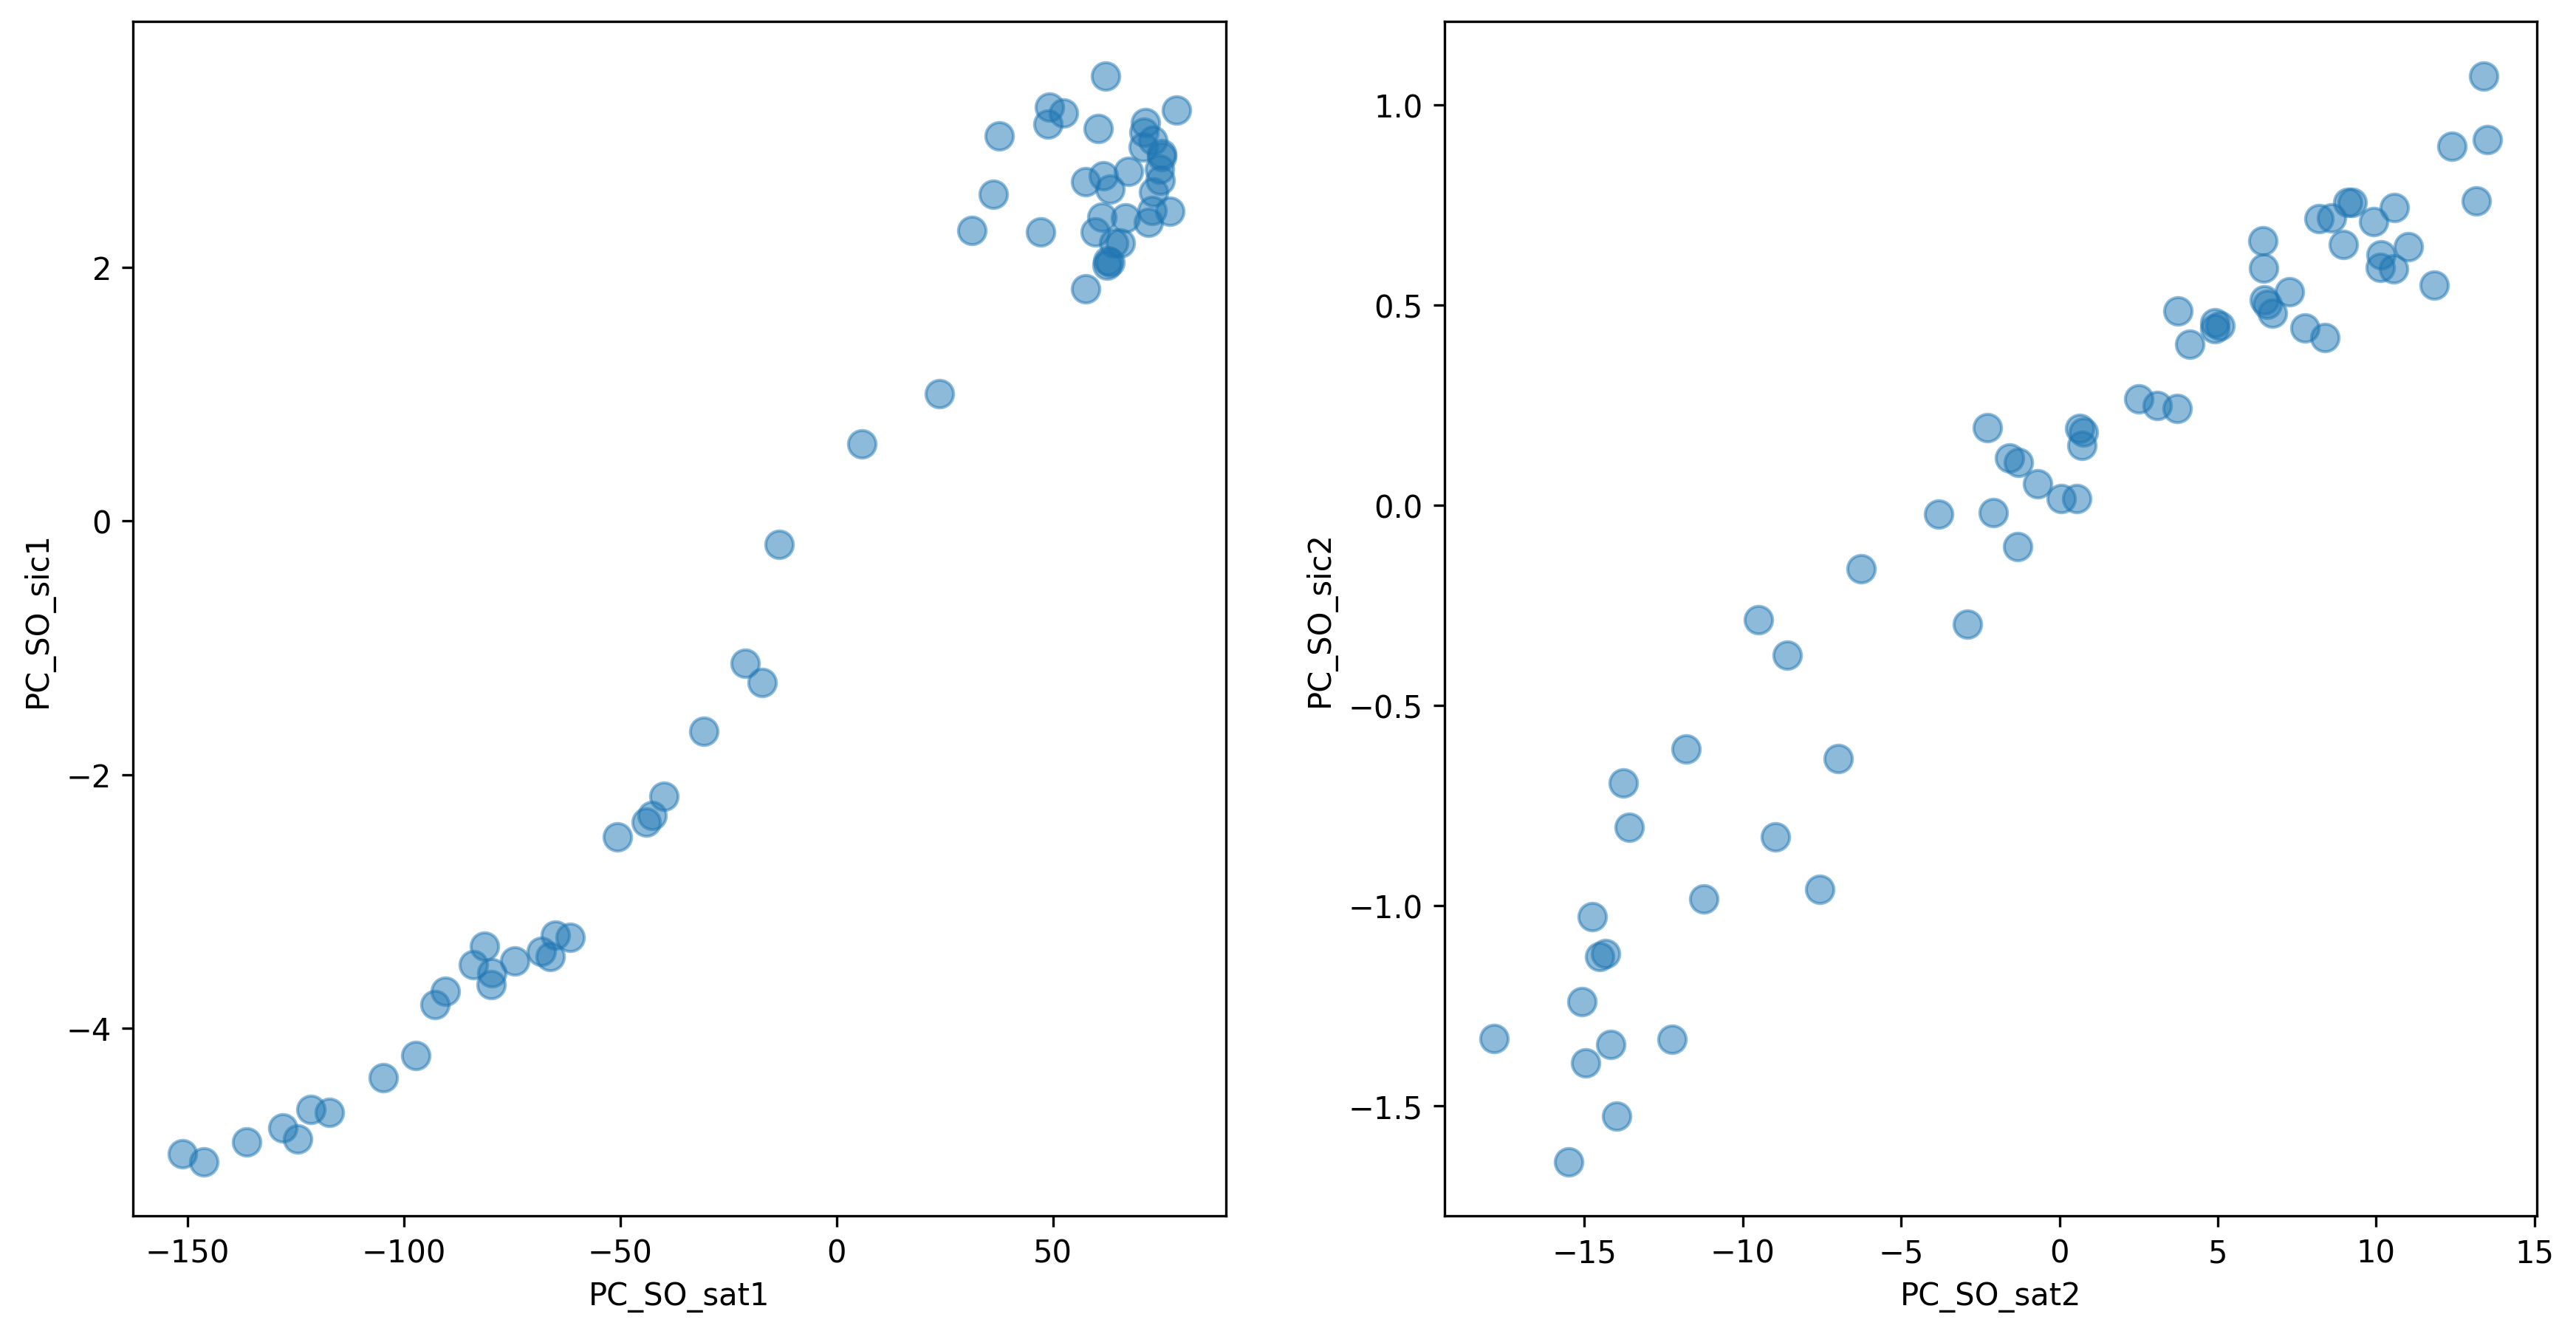

In [47]:
# plot scatter plot of PC_SO_sat1 vs PC_SO_sic1 and PC_SO_sat2 vs PC_SO_sic2 side by side
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

axs[0].scatter(PC_SO_sat1, PC_SO_sic1, s=80, alpha=0.5)
axs[0].set_xlabel('PC_SO_sat1')
axs[0].set_ylabel('PC_SO_sic1')

axs[1].scatter(PC_SO_sat2, PC_SO_sic2, s=80, alpha=0.5)
axs[1].set_xlabel('PC_SO_sat2')
axs[1].set_ylabel('PC_SO_sic2')

plt.show()

# Plot EOFS

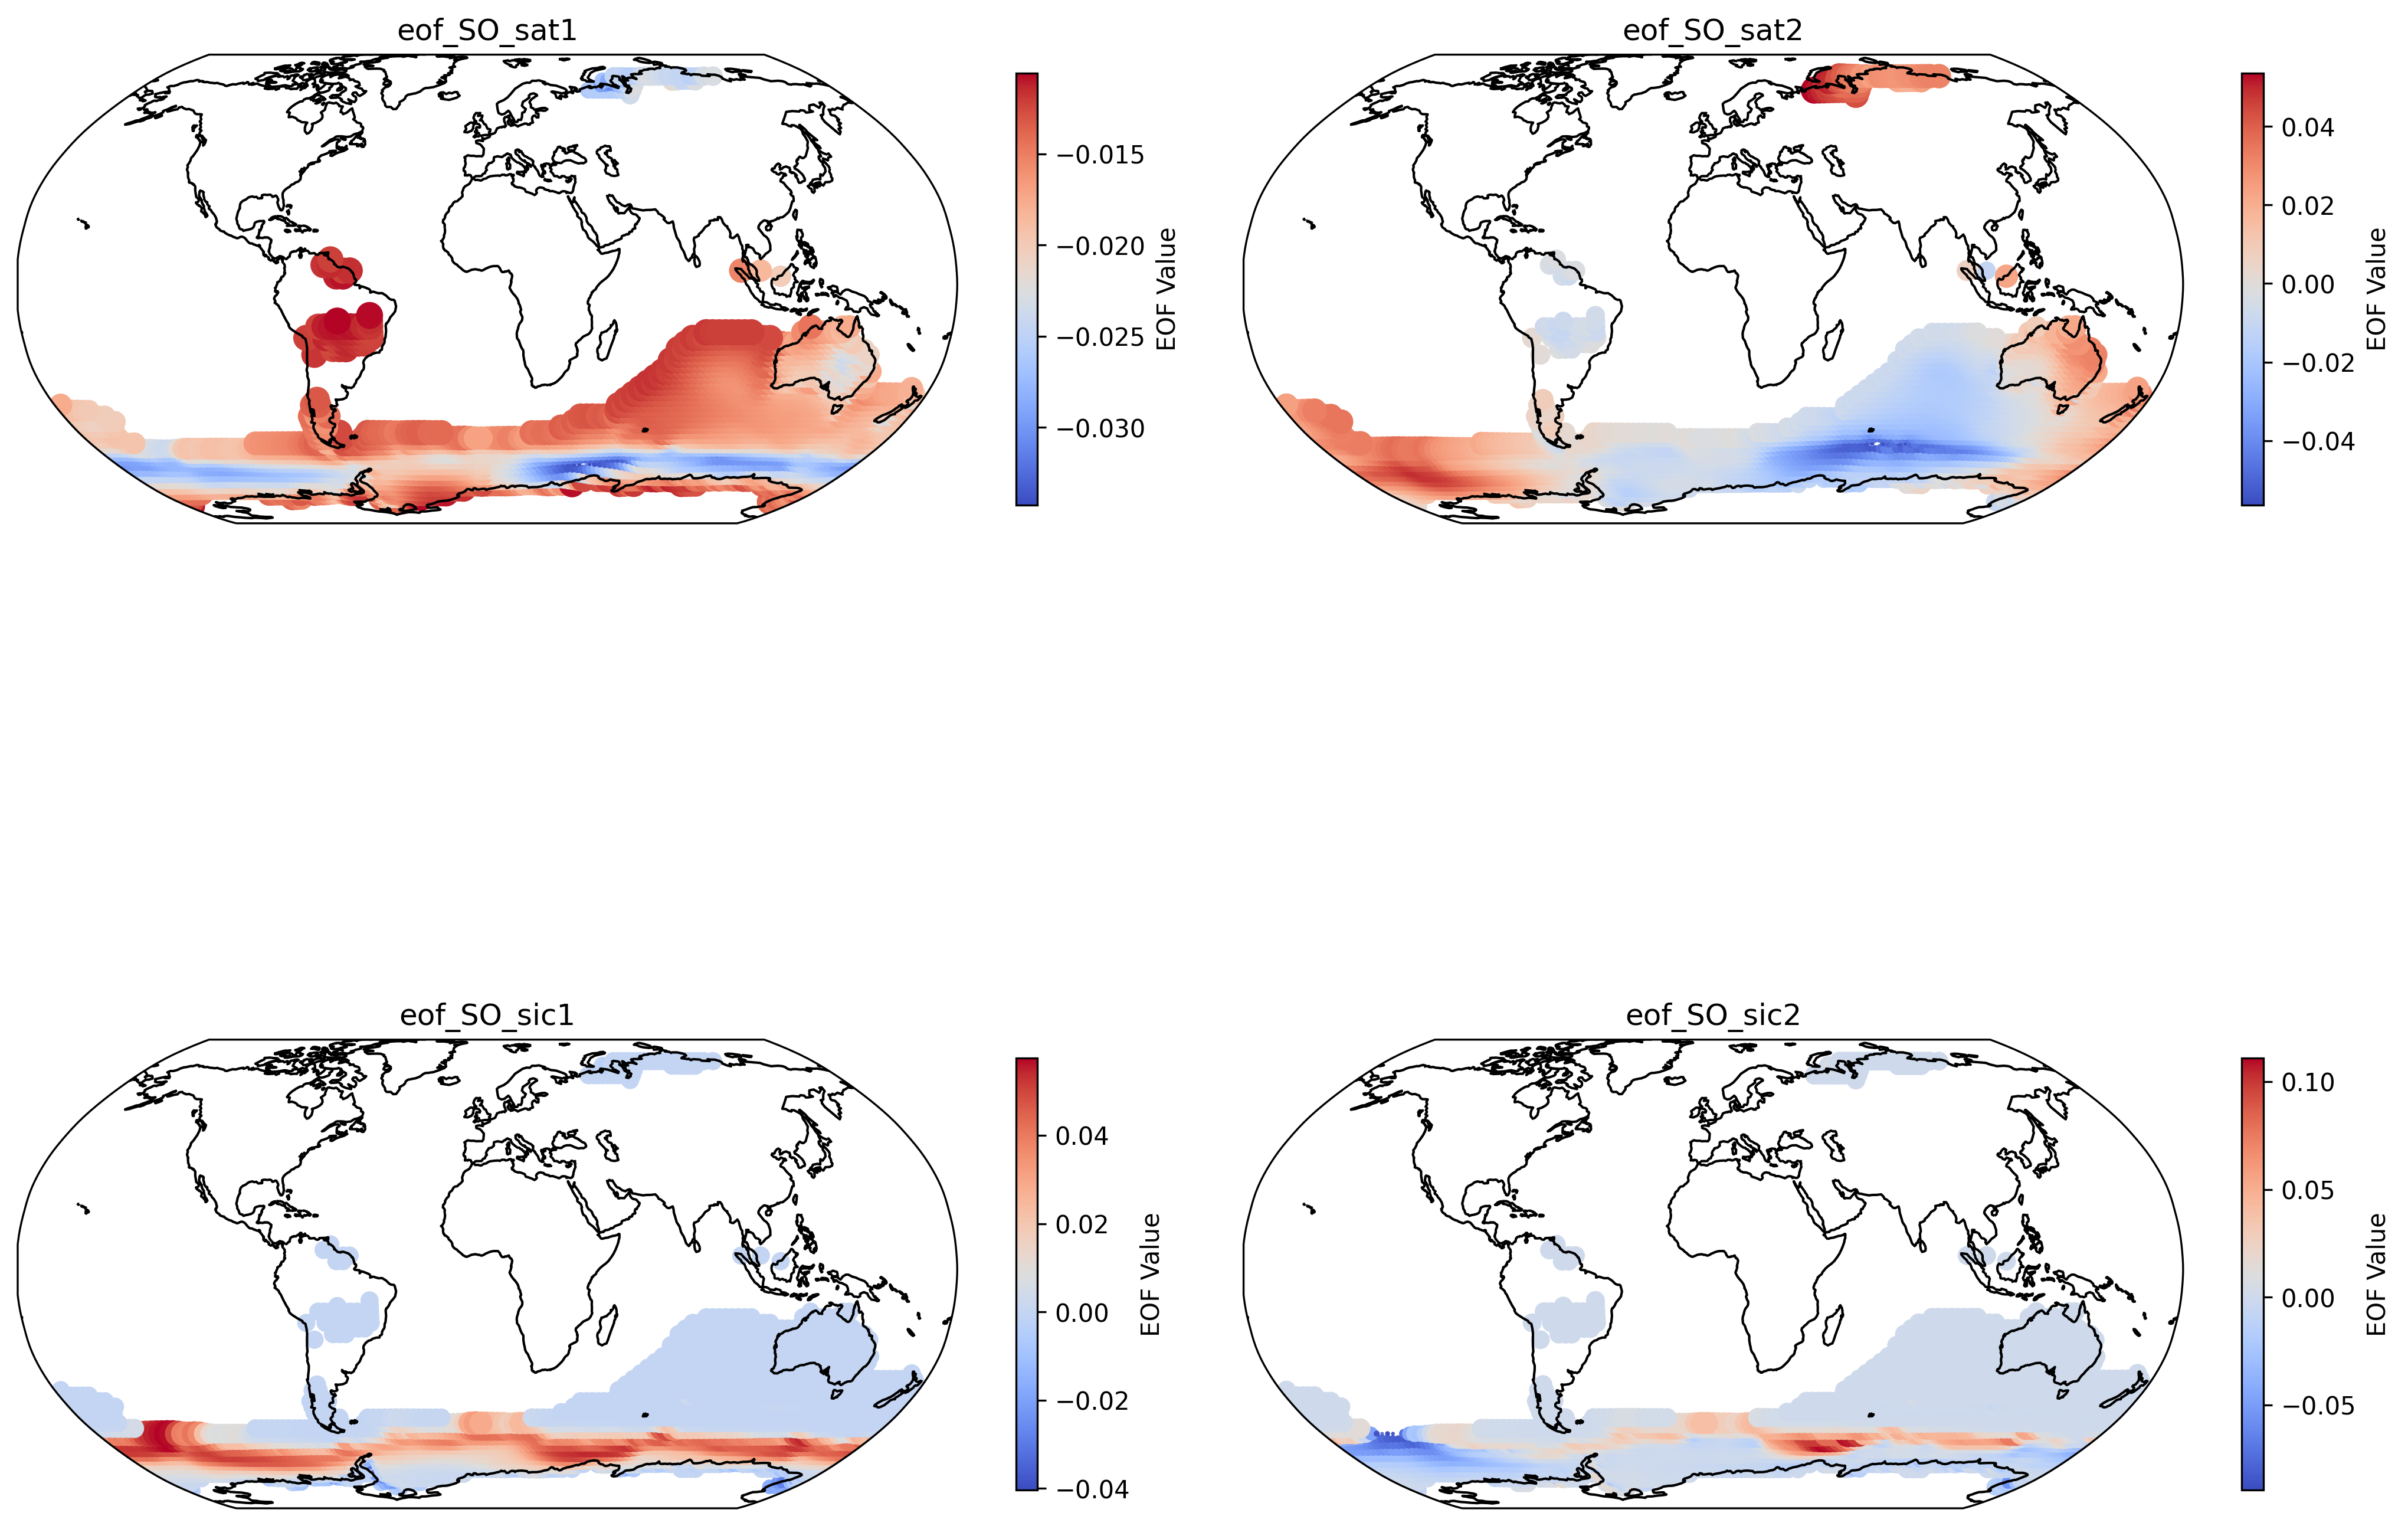

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Separate latitudes and longitudes from the pairs
lats, lons = zip(*lat_lon_pairs)

# List of EOFs to plot
eofs_list = [eof_SO_sat1, eof_SO_sat2, eof_SO_sic1, eof_SO_sic2]
titles = ['eof_SO_sat1', 'eof_SO_sat2', 'eof_SO_sic1', 'eof_SO_sic2']

# Create a figure and axes with a global map projection
fig, axs = plt.subplots(2, 2, figsize=(14, 14), dpi=300, subplot_kw=dict(projection=ccrs.Robinson()))

for i, ax in enumerate(axs.ravel()):
    eof = eofs_list[i]
    title = titles[i]

    # Normalizing the EOF values for size. This could be adapted per subplot if needed.
    eof_sizes = (eof - eof.min()) / (eof.max() - eof.min()) * 100

    ax.add_feature(cfeature.COASTLINE)
    scatter = ax.scatter(lons, lats, c=eof, s=eof_sizes, transform=ccrs.PlateCarree(), cmap='coolwarm')
    
    # Add a colorbar to each subplot
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05, shrink=0.3)
    cbar.ax.set_ylabel('EOF Value')
    
    ax.set_title(title)

# Adjust the layout
fig.tight_layout()
plt.show()


# We can see that the direction of PCs not match the real case in the data, so we correct it

In [52]:
corr_coef_sat1=-1
corr_coef_sat2=-1
corr_coef_sic1=1
corr_coef_sic2=1

eof_SO_sat1_corr=corr_coef_sat1*eof_SO_sat1
eof_SO_sat2_corr=corr_coef_sat2*eof_SO_sat2
eof_SO_sic1_corr=corr_coef_sic1*eof_SO_sic1
eof_SO_sic2_corr=corr_coef_sic2*eof_SO_sic2

PC_SO_sat1_test_corr=eof_SO_sat1_corr.T.dot(sat_SO_data)
PC_SO_sat2_test_corr=eof_SO_sat2_corr.T.dot(sat_SO_data)
PC_SO_sic1_test_corr=eof_SO_sic1_corr.T.dot(sic_SO_data)
PC_SO_sic2_test_corr=eof_SO_sic2_corr.T.dot(sic_SO_data)


# Plot the corrected PCs

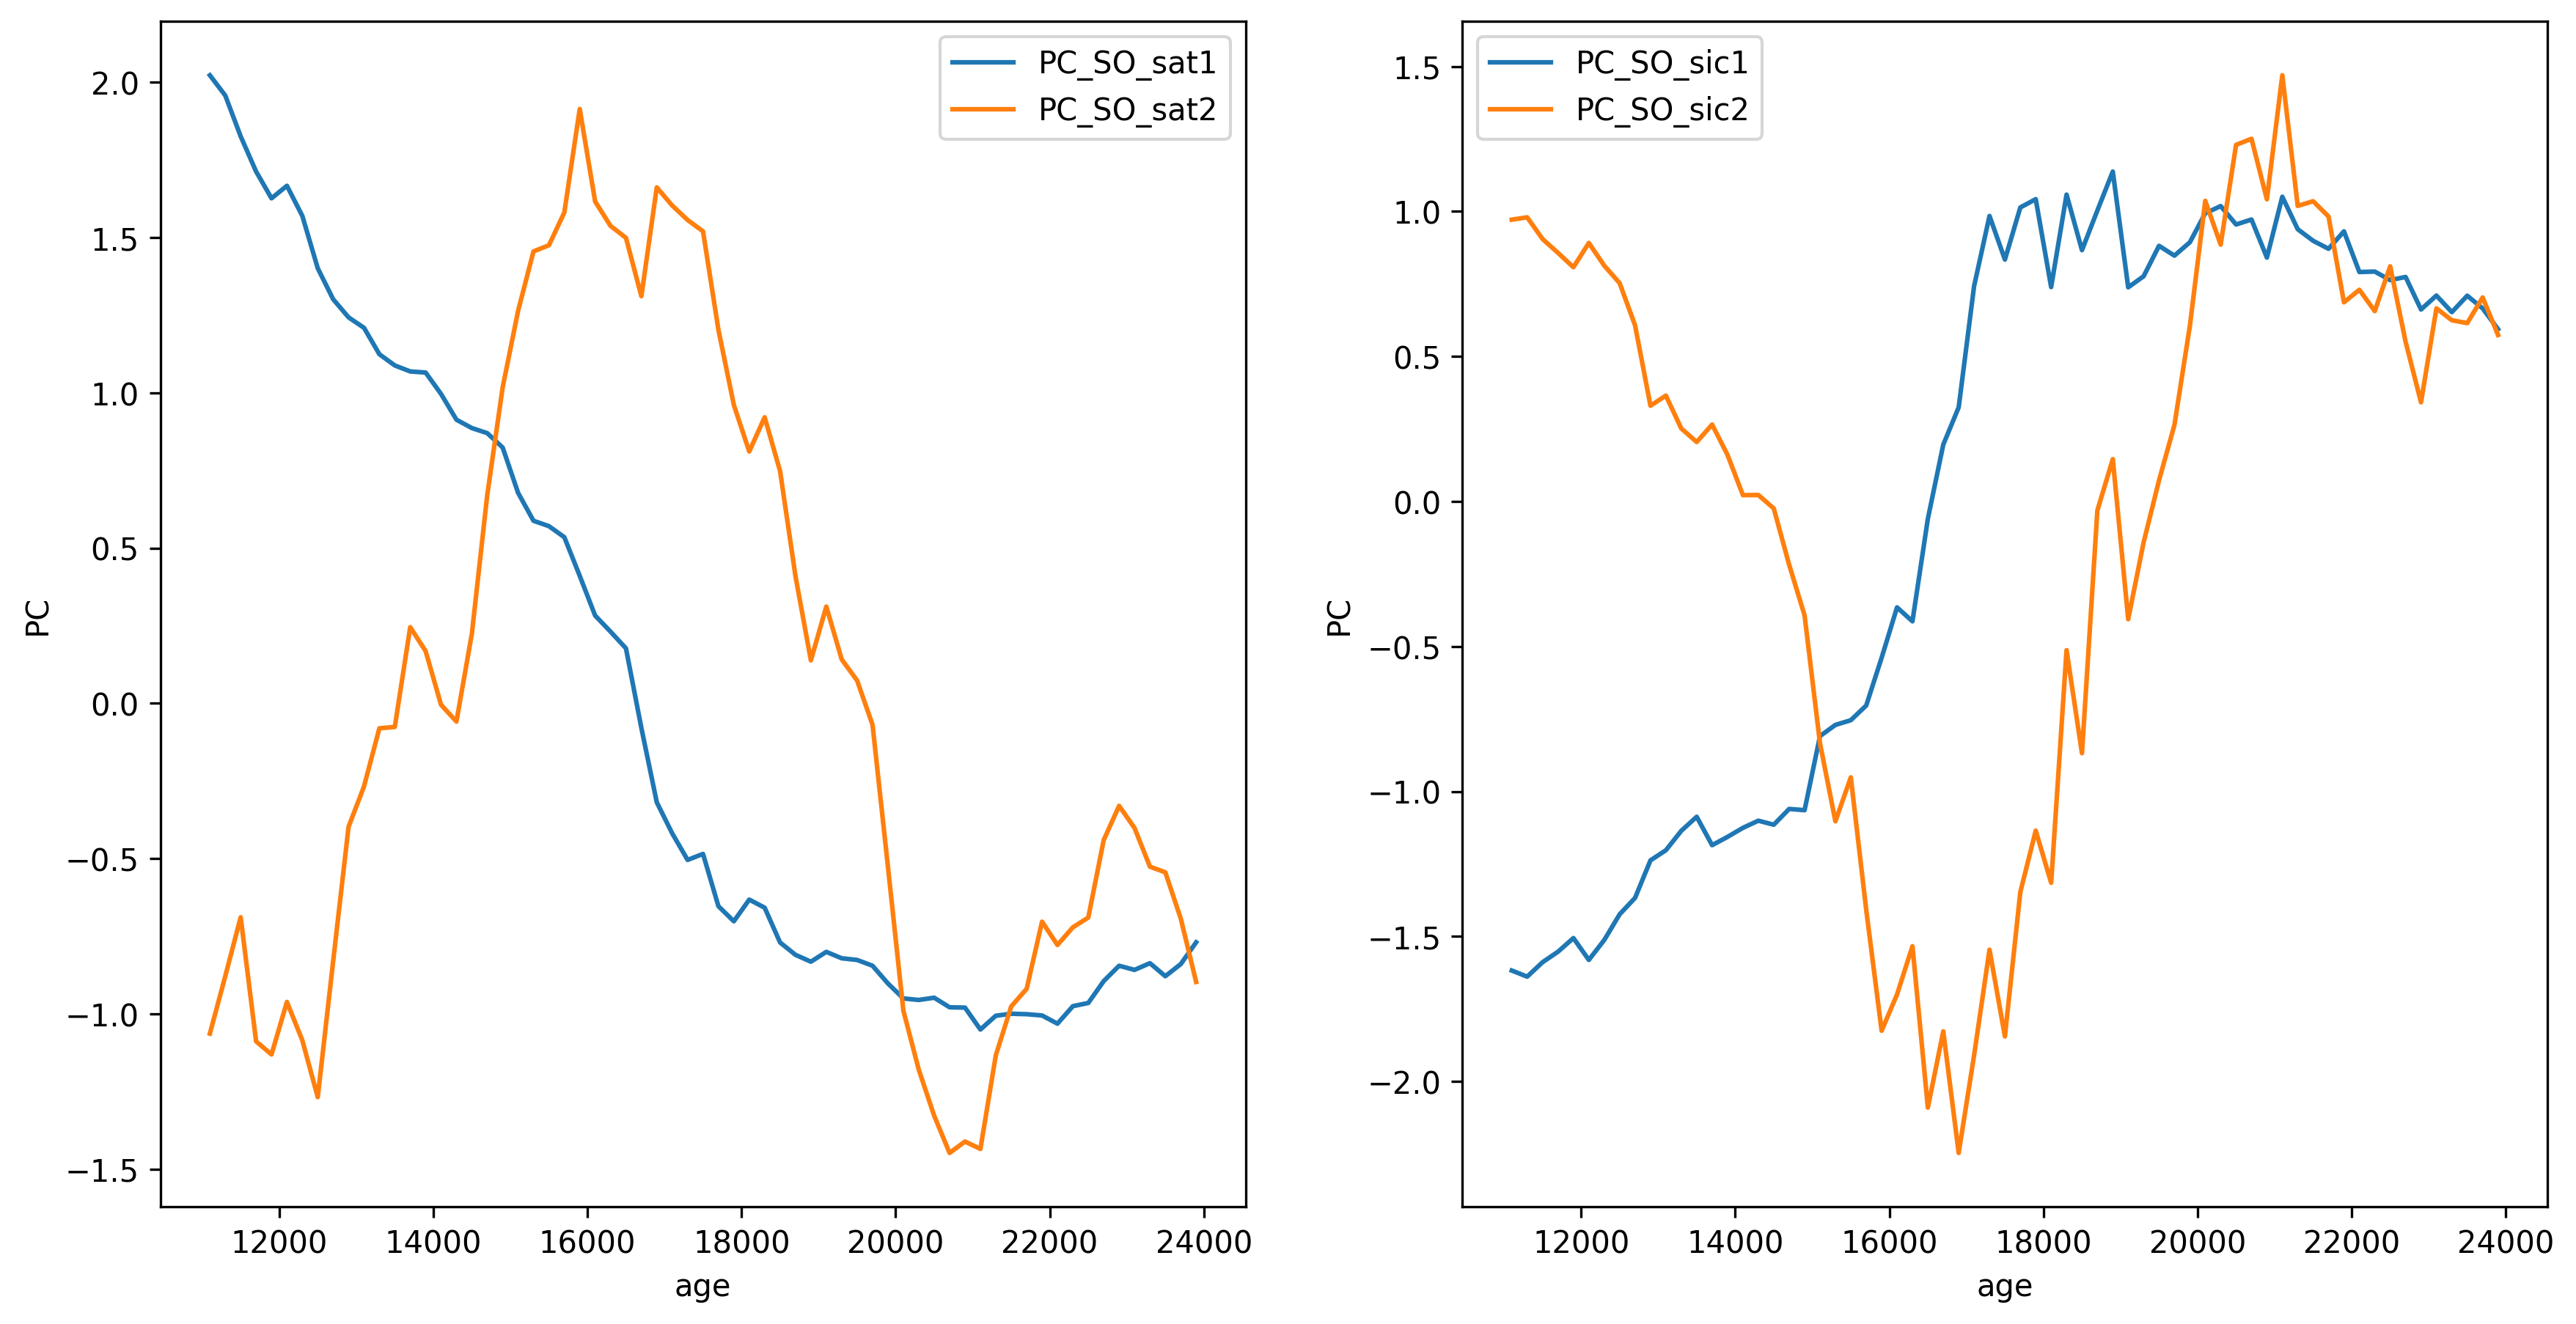

In [53]:

import matplotlib.pyplot as plt
from scipy.stats import zscore

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

axs[0].plot(ds_sat_EOFs['age'], zscore(PC_SO_sat1_test_corr), label='PC_SO_sat1')
axs[0].plot(ds_sat_EOFs['age'], zscore(PC_SO_sat2_test_corr), label='PC_SO_sat2')
axs[0].set_xlabel('age')
axs[0].set_ylabel('PC')
axs[0].legend()

axs[1].plot(ds_seaice['age'], zscore(PC_SO_sic1_test_corr), label='PC_SO_sic1')
axs[1].plot(ds_seaice['age'], zscore(PC_SO_sic2_test_corr), label='PC_SO_sic2')

axs[1].set_xlabel('age')
axs[1].set_ylabel('PC')
axs[1].legend()


# Plot the corrected EOFs

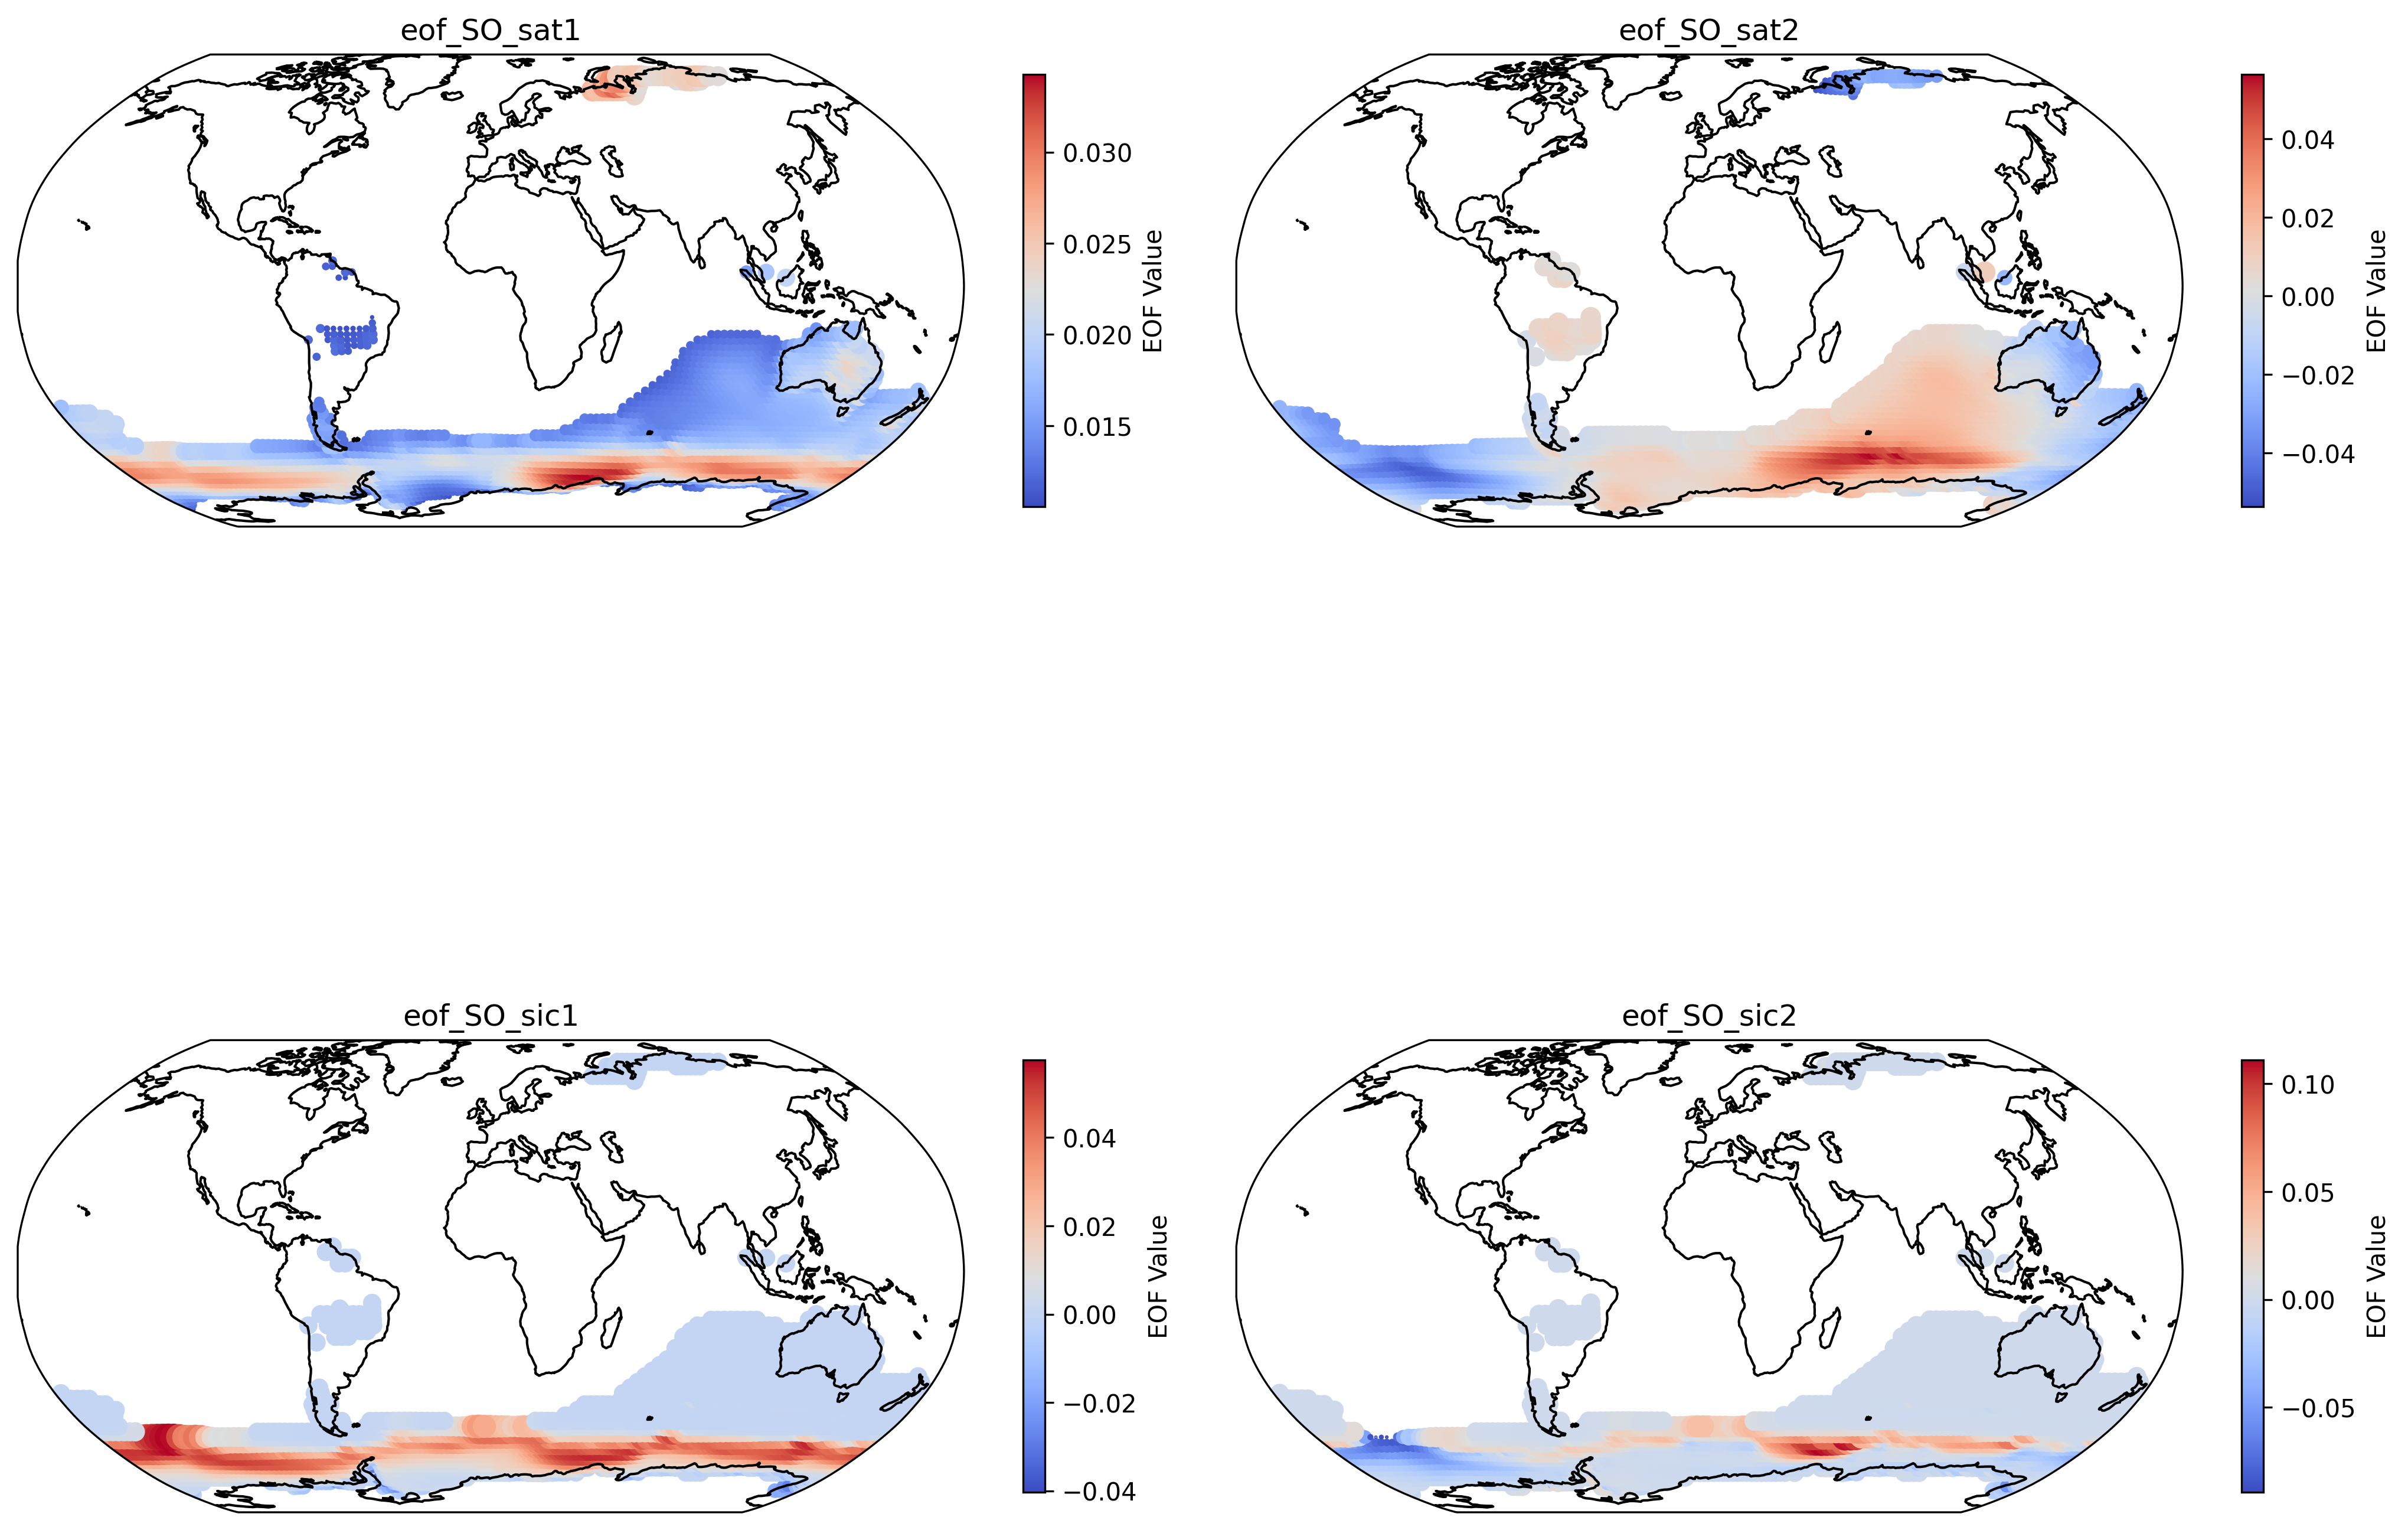

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Separate latitudes and longitudes from the pairs
lats, lons = zip(*lat_lon_pairs)

# List of EOFs to plot
eofs_list = [eof_SO_sat1_corr, eof_SO_sat2_corr, eof_SO_sic1_corr, eof_SO_sic2_corr]
titles = ['eof_SO_sat1', 'eof_SO_sat2', 'eof_SO_sic1', 'eof_SO_sic2']

# Create a figure and axes with a global map projection
fig, axs = plt.subplots(2, 2, figsize=(14, 14), dpi=300, subplot_kw=dict(projection=ccrs.Robinson()))

for i, ax in enumerate(axs.ravel()):
    eof = eofs_list[i]
    title = titles[i]

    # Normalizing the EOF values for size. This could be adapted per subplot if needed.
    eof_sizes = (eof - eof.min()) / (eof.max() - eof.min()) * 100

    ax.add_feature(cfeature.COASTLINE)
    scatter = ax.scatter(lons, lats, c=eof, s=eof_sizes, transform=ccrs.PlateCarree(), cmap='coolwarm')
    
    # Add a colorbar to each subplot
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05, shrink=0.3)
    cbar.ax.set_ylabel('EOF Value')
    
    ax.set_title(title)

# Adjust the layout
fig.tight_layout()
plt.show()


# Doing GMM on the four EOFs

# pLot EOFS

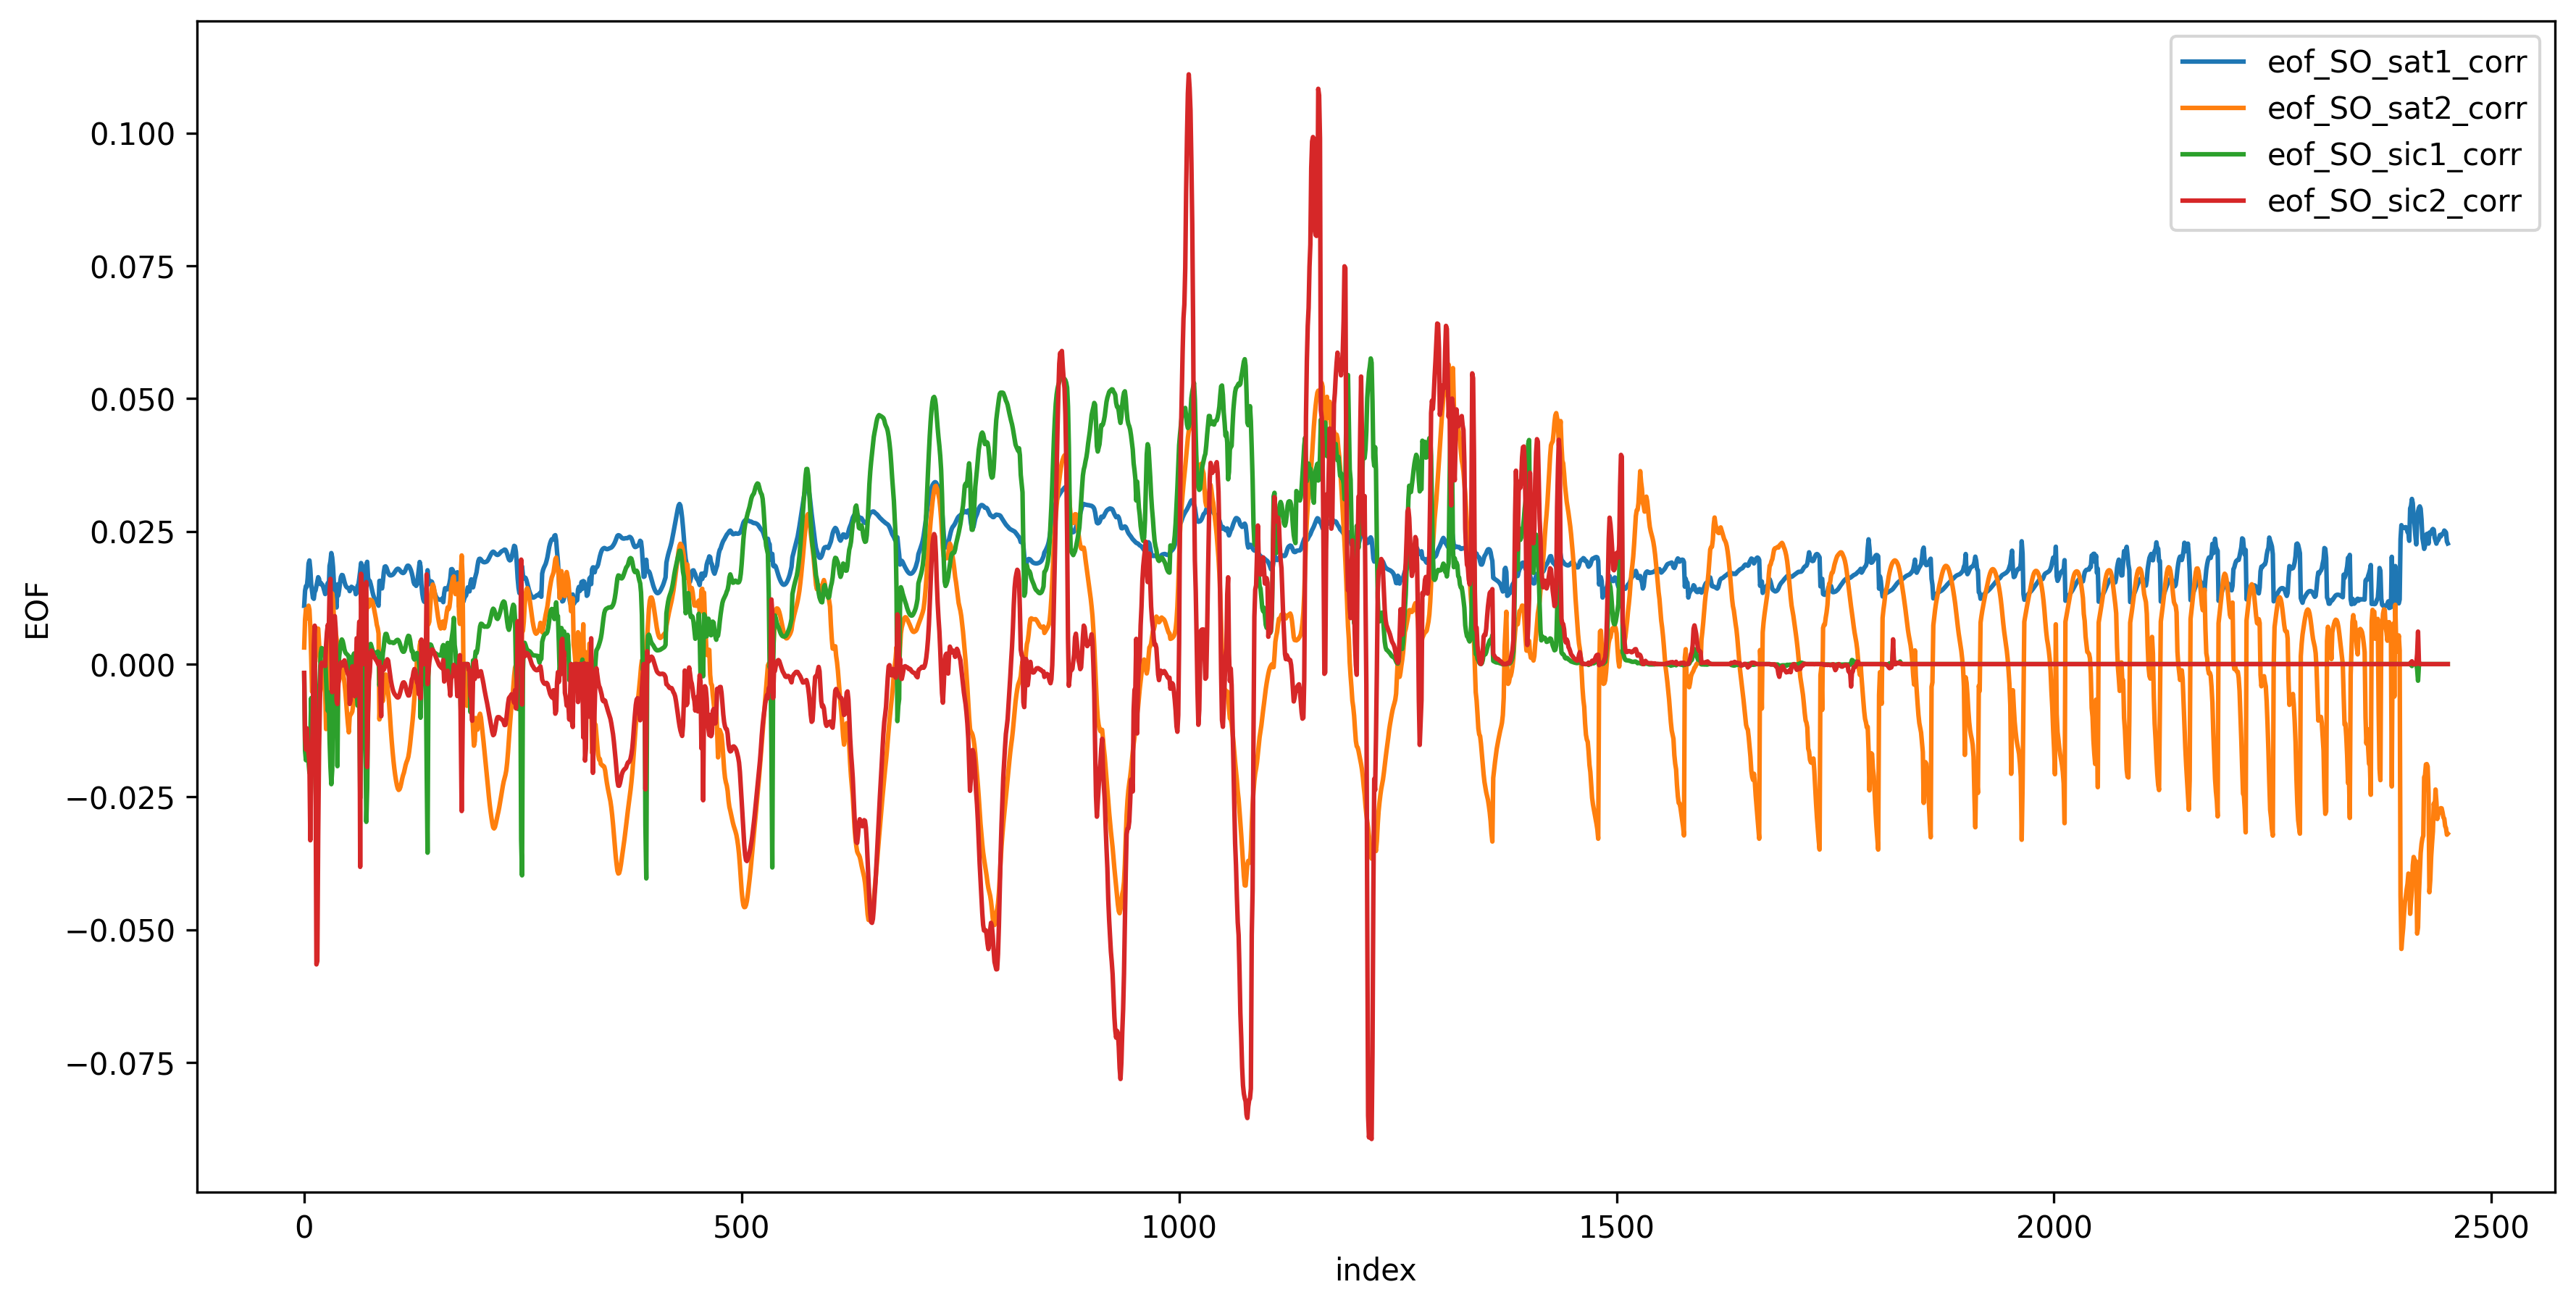

In [55]:
# plot the line plot of four corrected EOFs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=300)

ax.plot(range(len(eof_SO_sat1_corr)), eof_SO_sat1_corr, label='eof_SO_sat1_corr')
ax.plot(range(len(eof_SO_sat2_corr)), eof_SO_sat2_corr, label='eof_SO_sat2_corr')
ax.plot(range(len(eof_SO_sic1_corr)), eof_SO_sic1_corr, label='eof_SO_sic1_corr')
ax.plot(range(len(eof_SO_sic2_corr)), eof_SO_sic2_corr, label='eof_SO_sic2_corr')

ax.set_xlabel('index')
ax.set_ylabel('EOF')
ax.legend()




# Doing GMM

In [56]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Stack all four EOFs together
all_eofs = np.vstack([eof_SO_sat1_corr, eof_SO_sat2_corr, eof_SO_sic1_corr, eof_SO_sic2_corr]).T
print('Shape of all_eofs:', all_eofs.shape)

# Define the GMM model with 
gmm = GaussianMixture(n_components=5)

# Fit the GMM to the EOFs
gmm.fit(all_eofs)

# Predict the cluster each sample belongs to
labels = gmm.predict(all_eofs)



Shape of all_eofs: (2451, 4)


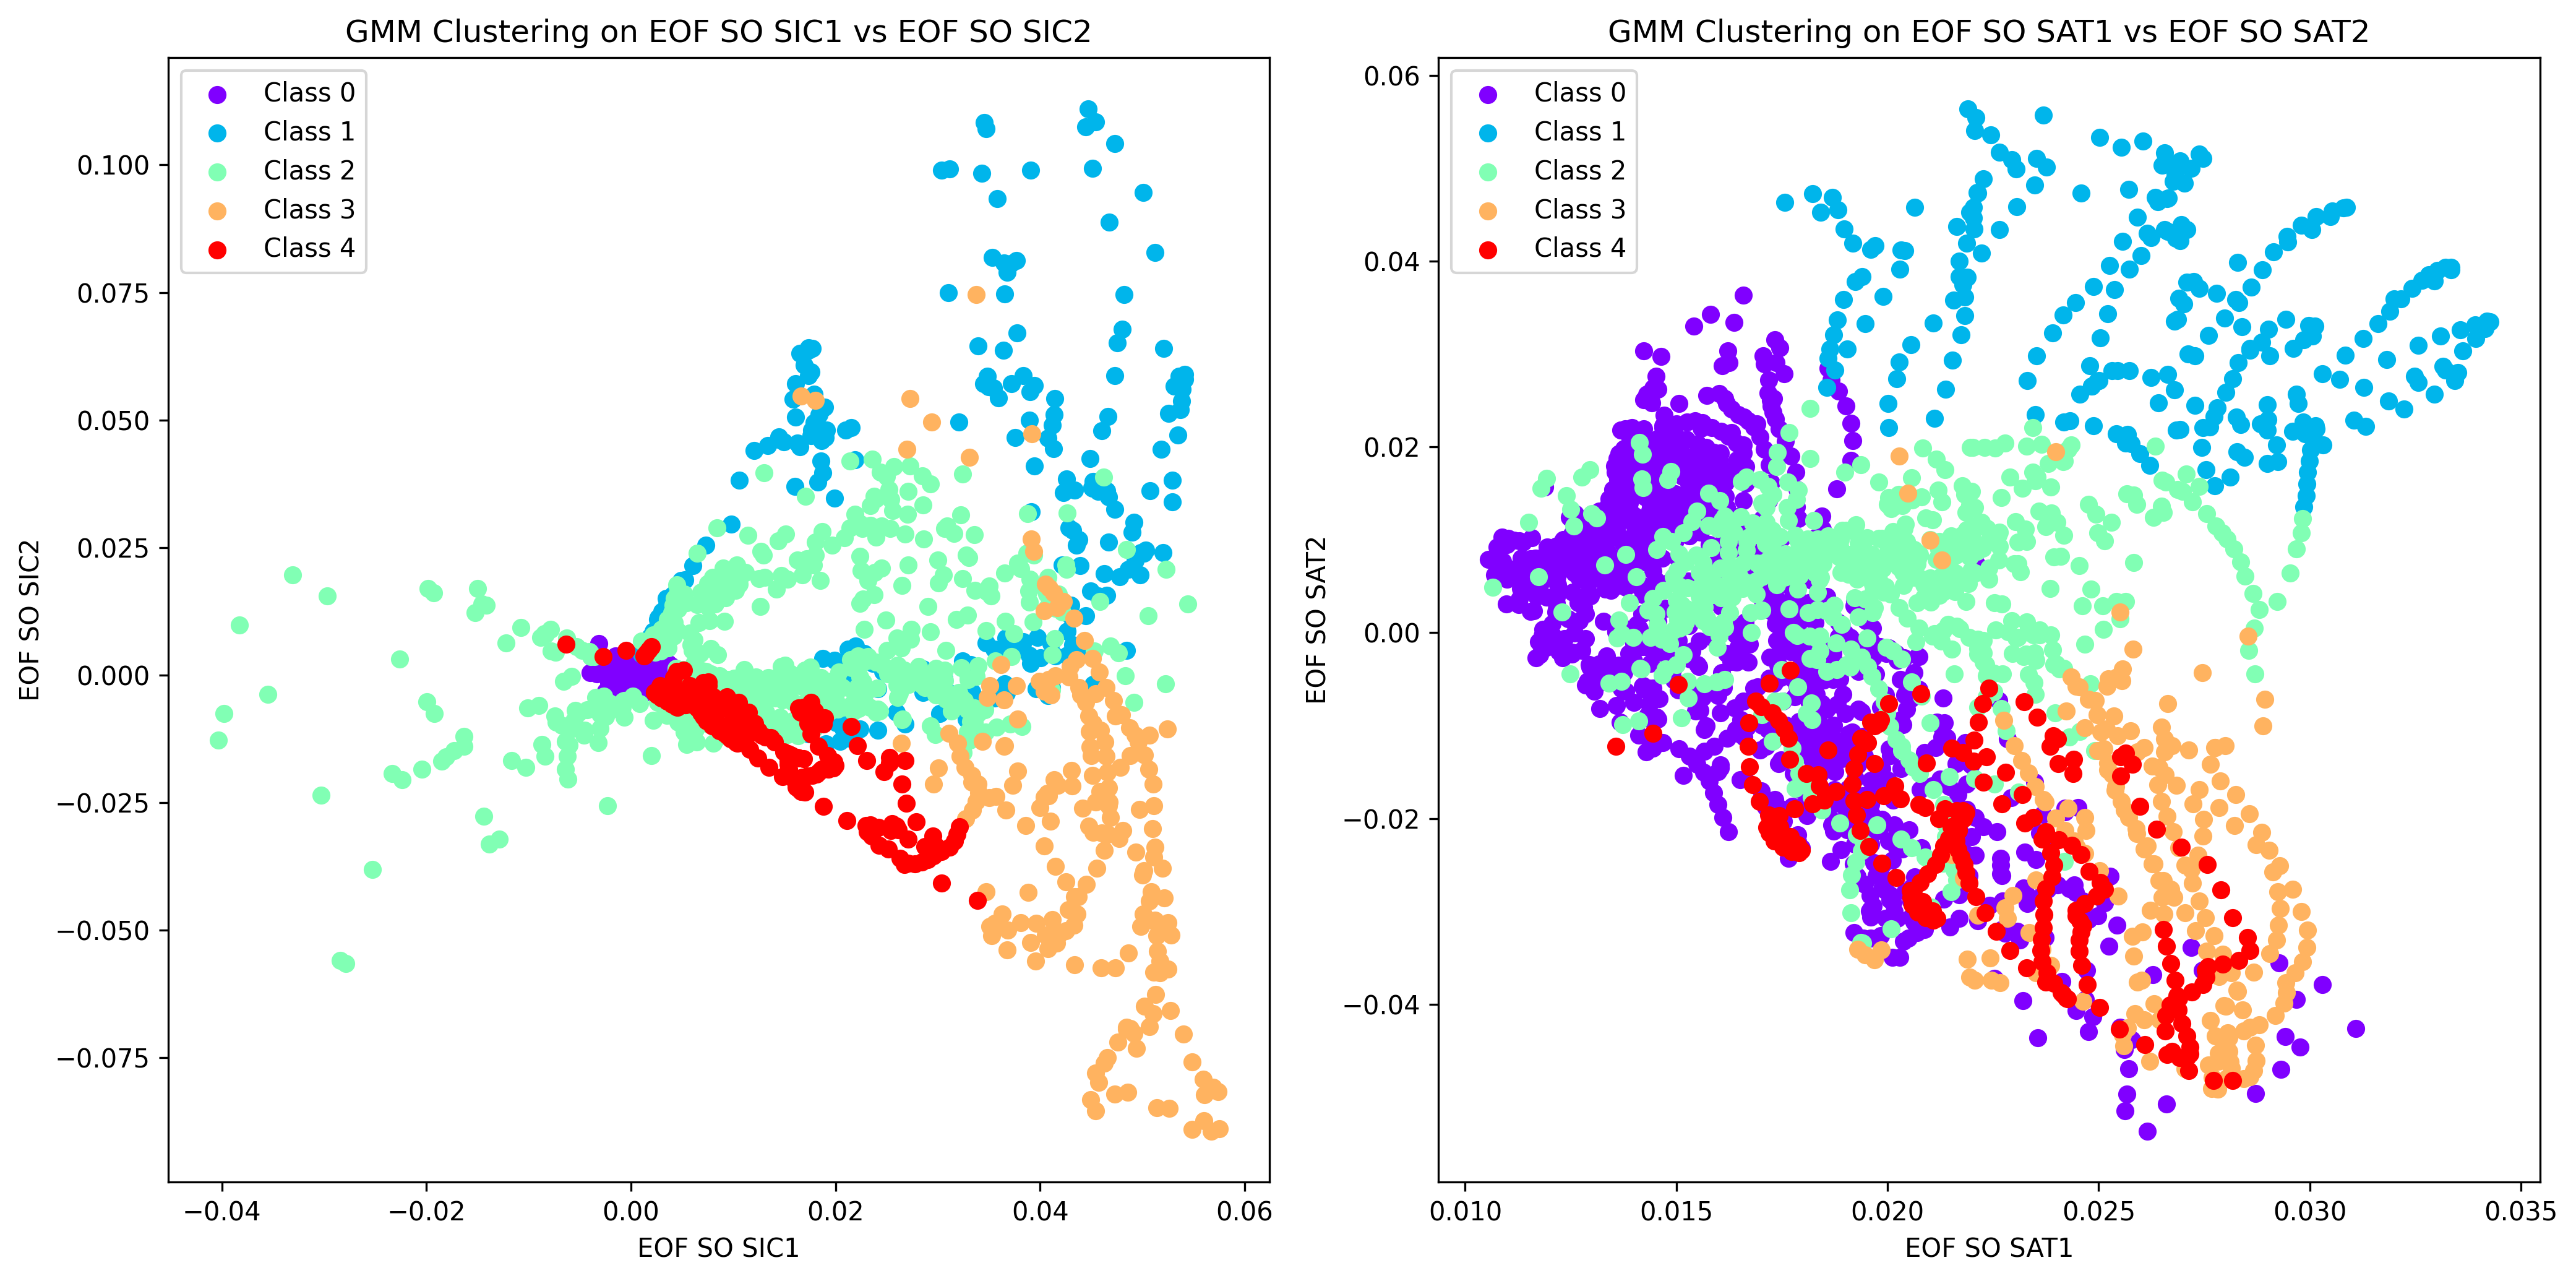

In [57]:
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

# Scatter plot for eof_SO_sic1_corr and eof_SO_sic2_corr
for label, color in zip(unique_labels, colors):
    indices = labels == label
    axs[0].scatter(eof_SO_sic1_corr[indices], eof_SO_sic2_corr[indices], color=color, label=f'Class {label}')
axs[0].set_title('GMM Clustering on EOF SO SIC1 vs EOF SO SIC2')
axs[0].set_xlabel('EOF SO SIC1')
axs[0].set_ylabel('EOF SO SIC2')
axs[0].legend()

# Scatter plot for eof_SO_sat1_corr and eof_SO_sat2_corr
for label, color in zip(unique_labels, colors):
    indices = labels == label
    axs[1].scatter(eof_SO_sat1_corr[indices], eof_SO_sat2_corr[indices], color=color, label=f'Class {label}')
axs[1].set_title('GMM Clustering on EOF SO SAT1 vs EOF SO SAT2')
axs[1].set_xlabel('EOF SO SAT1')
axs[1].set_ylabel('EOF SO SAT2')
axs[1].legend()

plt.tight_layout()
plt.show()

# Plot the spatial distribution of labels

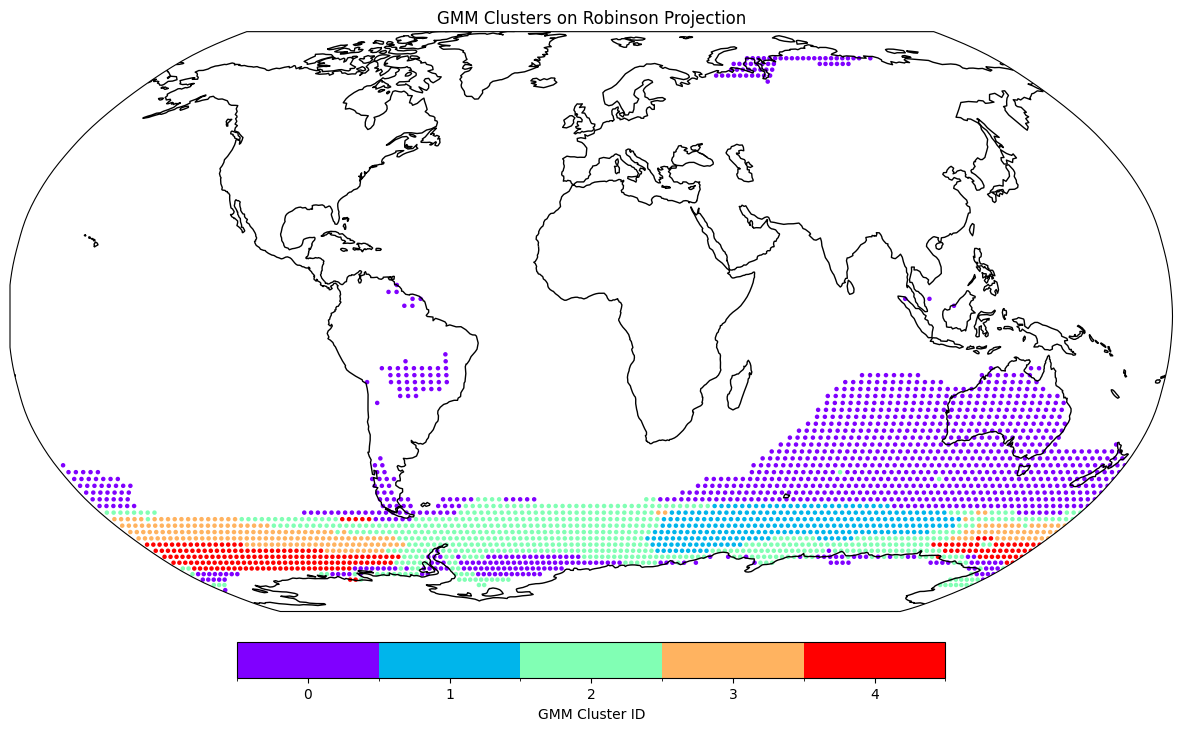

In [58]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap


# Extract latitudes and longitudes from lat_lon_pairs
lats = lat_lon_pairs[:, 0]
lons = lat_lon_pairs[:, 1]

# Create a new figure and set up the map with Robinson projection
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Add coastlines
ax.add_feature(cfeature.COASTLINE)

unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
colormap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, len(unique_labels) + 0.5), colormap.N)

# Plot latitude-longitude pairs colored by GMM labels
sc = ax.scatter(lons, lats, c=labels, s=5, cmap=colormap, norm=norm, transform=ccrs.PlateCarree())

# Add a colorbar with discrete colors
cbar_ticks = np.arange(len(unique_labels))
cbar = plt.colorbar(sc, ticks=cbar_ticks, orientation='horizontal', fraction=0.046, pad=0.04, ax=ax)
cbar.set_label('GMM Cluster ID')

# Display the plot
plt.title("GMM Clusters on Robinson Projection")
plt.show()